# Bus Data Analysis

## Research Question

Which Bus Service takes the least amount of time to reach the nearest MRT station between bus service 870 and 992?

## Executive Summary

asdasdasd

## Introduction

This project focuses on the analysis of Bus trip duration to determine which bus service between 870 and 992 would be better to travel in and out of Tengah new town using the Hypothesis Testing on both samples.



## Objective of this test

This test aims to find out between the two bus services 870 and 992 which bus service is better to take to reach the nearest MRT station at any point of time from the location of Tengah in Singapore and from the location of the 2 MRT station (Bukit Batok or Jurong East)

## Dataset Origin

Both dataset are generated from Numpy to ensure both dataset passes the Normality test in Minitab.

The source code on how would each dataset being generated is in [this link](https://github.com/AngKokLeong/Bus-Data-Analysis/blob/master/data_generator.py) .

Each synthetic data column are generated using Numpy library with this method [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Three synthetic data columns are then combined together to form One Pandas DataFrame for the ease of exporting the data into CSV file.




## Data Collection Method

The sample data are collected through observation on my own personal experience from 01 April 2024 to 26 July 2024 when I was boarding these two bus service 870 and 992 to the nearest MRT station.

The sample data in this test are restricted from 01 April 2024 to 26 July 2024 on the bus trip data retrieved from SimplyGo mobile application.

The two population in this test are the bus trip data of the bus service 992 and 870 that could consist of:
-	Collection of Bus Stop information 
-	Starting time of the bus trip
-	Ending Time of the bus trip
-	Check in time when a bus reaches a bus stop

<sub>Definition of Population: https://www.investopedia.com/terms/p/population.asp </sub>

## Data Dictionary

There are three features in this dataset.

Trip Durations
- Data Type: Float
- The total duration of the Bus Trip from end to end
- The value in this data column represents in minutes (mins)
    - (Computed from the starting time of boarding the bus to the ending time of alighting the bus)

Distances
- Data Type: Float
- Total Distance of the Bus Trip from end to end 
- The value in this data column represents in Kilometres (KM)


There are 164 data records of bus trips for Bus Service 870 and 70 data records of bus trips for Bus Service 992.

There are a total of 117 days.

There are a total of 234 bus trips.

Each day there are two bus trips where the first bus trip is going towards the MRT Station and the second bus trip is from either MRT station (Jurong East or Bukit Batok).

## Test Setup

In [1]:
import pandas
import matplotlib.pyplot
import numpy
import scipy
import sample_data_generator

In [2]:
# Loading data into pandas dataframe

bus_870_dataframe: pandas.DataFrame = pandas.read_csv("bus_870_synthetic_data.csv", usecols=["trip_durations",  "distances"])
bus_992_dataframe: pandas.DataFrame = pandas.read_csv("bus_992_synthetic_data.csv", usecols=["trip_durations",  "distances"])


## Generating Sample Data using Simple Random Sampling Method

In [3]:
bus_870_sample_dataframe: pandas.DataFrame = sample_data_generator.simple_random_sampling(bus_870_dataframe, 50, 1)

In [4]:
bus_992_sample_dataframe: pandas.DataFrame = sample_data_generator.simple_random_sampling(bus_992_dataframe, 50, 1)

Sample data generated by Simple Random Sampling method where 50 sample data are randomly selected from the main dataset collected for this test.

## Output Sample Data 

In [5]:
bus_870_sample_dataframe.to_csv("bus_870_sample_data.csv")

In [6]:
bus_992_sample_dataframe.to_csv("bus_992_sample_data.csv")

## Exploratory Data Analysis for the sample dataset of Bus 870

#### Five Number Summary for trip_durations in the dataset of Bus 870

In [17]:
five_number_summary_for_bus_870_trip_durations_sample: pandas.Series = bus_870_sample_dataframe["trip_durations"].describe()
bus_870_sample_dataframe["trip_durations"].describe()

count    50.000000
mean     49.946451
std       1.657832
min      46.439057
25%      48.748028
50%      49.900329
75%      50.973456
max      53.988955
Name: trip_durations, dtype: float64

#### Five Number Summary for distances in the dataset of Bus 870

In [18]:
five_number_summary_for_bus_870_distances_sample: pandas.Series = bus_870_sample_dataframe["distances"].describe()
bus_870_sample_dataframe["distances"].describe()

count    50.000000
mean      6.197569
std       0.009571
min       6.180037
25%       6.190366
50%       6.195382
75%       6.205239
max       6.223544
Name: distances, dtype: float64

#### Boxplot for trip_durations in the dataset of Bus 870

<Axes: >

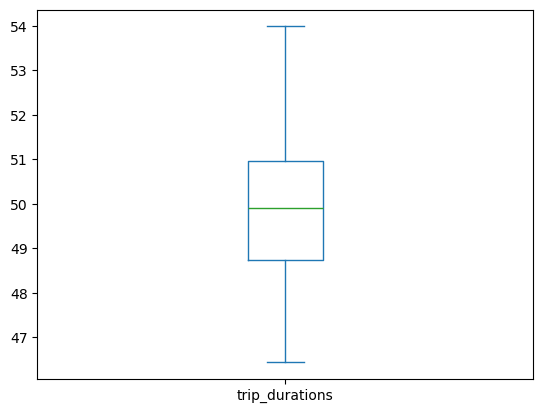

In [19]:
bus_870_sample_dataframe["trip_durations"].plot(kind="box")

#### Boxplot for distances in the dataset of Bus 870

<Axes: >

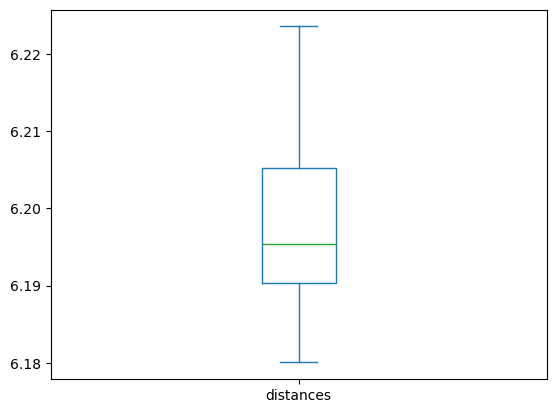

In [20]:
bus_870_sample_dataframe["distances"].plot(kind="box")

## Exploratory Data Analysis for the dataset of Bus 992

#### Five Number Summary for distances in the dataset of Bus 992

In [13]:
five_number_summary_for_bus_992_distances_sample: pandas.Series = bus_992_sample_dataframe["distances"].describe()
bus_992_sample_dataframe["distances"].describe()

count    50.000000
mean      5.999596
std       0.011615
min       5.976641
25%       5.991345
50%       5.998705
75%       6.006915
max       6.031780
Name: distances, dtype: float64

#### Five Number Summary for trip_durations in the dataset of Bus 992

In [14]:
five_number_summary_for_bus_992_trip_durations_sample: pandas.Series = bus_992_sample_dataframe["trip_durations"].describe()
bus_992_sample_dataframe["trip_durations"].describe()

count    50.000000
mean     39.987222
std       1.335012
min      36.620774
25%      39.101953
50%      40.016155
75%      41.132444
max      42.551449
Name: trip_durations, dtype: float64

#### Boxplot on trip_durations in the dataset of Bus 992

<Axes: >

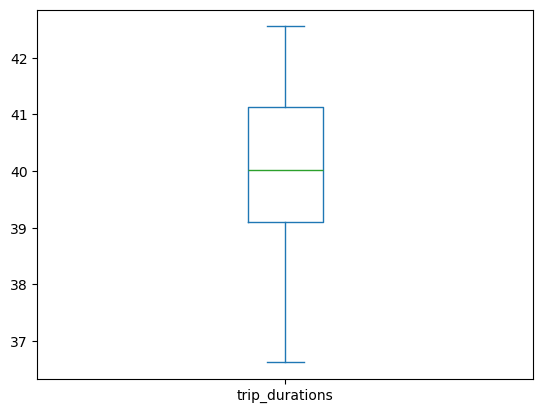

In [15]:
bus_992_sample_dataframe["trip_durations"].plot(kind="box")

#### Boxplot for distances in the dataset of Bus 992

<Axes: >

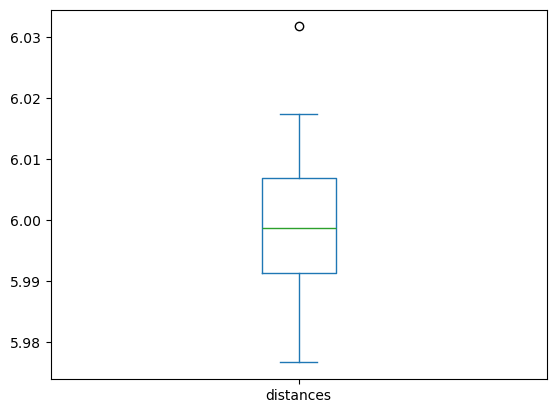

In [16]:
bus_992_sample_dataframe["distances"].plot(kind="box")

## Setting the Level of Significance for this test

Since the accuracy of the bus waiting time and the entire bus trip from end to end needs to be precise, the current <b>Significance Level</b> will be set at <b><u>0.01</u></b>.

## Setting up the Confidence Interval

The setup of the Confidence Interval is using the current configuration where the population standard deviation is unknown therefore, the following formula is used to calculate the lower bound and upper bound of the confidence interval.

point estimate $\pm$ margin of error

$\overline x  \pm  z^*  (\frac{\sigma}{\sqrt n}) $


Reference from https://asciimath.org/ https://docs.mathjax.org/en/latest/index.html https://katex.org/ for mathematical expression in markdown


### Confidence Interval for Bus 870 (Distances)

In [21]:
sample_data_generator.generate_confidence_interval_for_t_test_with_unknown_sigma(0.01,
                                                              five_number_summary_for_bus_870_distances_sample["mean"],
                                                              five_number_summary_for_bus_870_distances_sample["std"],
                                                              data_source=bus_870_sample_dataframe["distances"]
                                                            )

{'Sample_Mean': 6.197568745931306,
 'Lower Bound Confidence Interval': 6.200823986845401,
 'Upper Bound Confidence Interval': 6.1943135050172105}

### Confidence Interval for Bus 870 (trip_durations)

In [22]:
sample_data_generator.generate_confidence_interval_for_t_test_with_unknown_sigma(0.01,
                                                              five_number_summary_for_bus_870_trip_durations_sample["mean"],
                                                              five_number_summary_for_bus_870_trip_durations_sample["std"],
                                                              data_source=bus_870_sample_dataframe["trip_durations"]
                                                            )

{'Sample_Mean': 49.94645072701963,
 'Lower Bound Confidence Interval': 50.510284422442936,
 'Upper Bound Confidence Interval': 49.382617031596325}

### Confidence Interval for Bus 992 (Distances)

In [23]:
sample_data_generator.generate_confidence_interval_for_z_test_with_known_sigma(0.01,
                                                              five_number_summary_for_bus_992_distances_sample["mean"],
                                                              five_number_summary_for_bus_992_distances_sample["std"],
                                                              data_source=bus_992_sample_dataframe["distances"]
                                                            )

{'Sample_Mean': 5.999595917214452,
 'Lower Bound Confidence Interval': 5.995774679664207,
 'Upper Bound Confidence Interval': 6.003417154764698}

### Confidence Interval for Bus 992 (trip_durations)

In [24]:
sample_data_generator.generate_confidence_interval_for_z_test_with_known_sigma(0.01,
                                                              five_number_summary_for_bus_992_trip_durations_sample["mean"],
                                                              five_number_summary_for_bus_992_trip_durations_sample["std"],
                                                              data_source=bus_992_sample_dataframe["trip_durations"]
                                                            )


{'Sample_Mean': 39.98722247549312,
 'Lower Bound Confidence Interval': 39.54800973576458,
 'Upper Bound Confidence Interval': 40.42643521522166}

### Test Results for Confidence Interval for all sample dataset and its data column

Trip Durations Bus 992
- Sample Mean: 40.101045565910354
- Upper Bound: 40.50825661442525
- Lower Bound: 39.69383451739546

Distances Bus 992
- Sample Mean: 5.998875895144294
- Upper Bound: 6.001880772395153
- Lower Bound: 5.9958710178934345

Bus 870 trip_duration
- Sample Mean: 49.774774773269144
- Upper Bound: 50.09396492044416
- Lower Bound: 49.45558462609413

Bus 870 Distances
- Sample Mean: 6.199350836959833
- Upper Bound: 6.201267764450136
- Lower Bound: 6.19743390946953


The sample mean for the sample data of Bus 992 trip_durations falls under the Confidence Interval [39.69383451739546, 40.50825661442525] with the significance level of 0.01 and the sample mean of 40.101045565910354.

The sample mean for the sample data of Bus 992 distances falls under the Confidence Interval [5.9958710178934345, 6.001880772395153] with the significance level of 0.01 and the sample mean of 5.998875895144294.

The sample mean for the sample data of Bus 870 trip_durations falls under the Confidence Interval [49.45558462609413, 50.09396492044416] with the significance level of 0.01 and the sample mean of 49.774774773269144.

The sample mean for the sample data of Bus 870 distances falls under the Confidence Interval [6.19743390946953, 6.201267764450136] with the significance level of 0.01 and the sample mean of 6.199350836959833.

## Conducting Normality Test on Sample Dataset

In [25]:
scipy.stats.normaltest(bus_870_sample_dataframe["distances"])

NormaltestResult(statistic=2.8773576352504793, pvalue=0.2372409903334897)

In [26]:
scipy.stats.normaltest(bus_870_sample_dataframe["trip_durations"])

NormaltestResult(statistic=0.5336533486923078, pvalue=0.7658057937528744)

In [27]:
scipy.stats.normaltest(bus_992_sample_dataframe["distances"])

NormaltestResult(statistic=1.1870843046765334, pvalue=0.5523672464731322)

In [28]:
scipy.stats.normaltest(bus_992_sample_dataframe["trip_durations"])

NormaltestResult(statistic=0.767068827173195, pvalue=0.681448626553913)

The p-value for the sample data of Bus 870 is 0.86.

The p-value for the sample data of Bus 992 is 0.89.

Since the alpha = 0.01 and the p-value for both sample data is above 0.01.

Therefore, the alternative hypothesis where the sample data extracted from the population does not follow the normal distribution is rejected.

The sample data for Bus 870 and Bus 992 are retrieved from the population dataset where it follows the normal distribution so the following hypothesis test can be used:

- Paired t-test
- Two-sample independent t-test
- ANOVA F-test



## Setup of Two Sample Independent t-test

Two Sample T-Test is selected due to two sample dataset which contains data of bus trip for 870 and 992 are two independent bus service.

In Normality test conducted earlier, the sample dataset for Bus service 870 and 992 are tested and determined that both sample dataset are extracted from population dataset follows normal distribution.



### Conduct F-Test to verify for Equal Variance

In [34]:
scipy.stats.f_oneway(bus_992_sample_dataframe["trip_durations"], bus_870_sample_dataframe["trip_durations"])


F_onewayResult(statistic=1094.6101487363205, pvalue=5.5603465639410296e-55)

Since the p-value for F-test is below 0.01, therefore the Two Sample Independent t-test for unequal variance will be used in the next step.

### Conduct Two Sample T-Test with Unequal Variances

Since the test results from the F-Test indicates that the

In [35]:
scipy.stats.ttest_ind(bus_992_sample_dataframe["trip_durations"], bus_870_sample_dataframe["trip_durations"], equal_var=False)

# Reference from Scipy documentation for Two Sample Independent t-test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

TtestResult(statistic=-33.08489305916398, pvalue=1.7166395020415975e-53, df=93.73737650623124)

In [36]:
scipy.stats.ttest_ind(bus_992_sample_dataframe["trip_durations"], bus_870_sample_dataframe["trip_durations"], equal_var=False).confidence_interval(confidence_level=0.99)

ConfidenceInterval(low=-10.750701203407429, high=-9.167755299645593)

Since the P-Value is less than a = 0.01, it is rare to get a difference of sample mean Trip Duration if the population mean difference is 0.

The Two Sample T-Test proofs that there are differences in Trip Duration between the Bus Service 992 and 870.

Based on the Two Sample Independent t-test with unequal variance, the test result shows the Bus Service 992 reaches to the nearest MRT station faster than Bus Service 870.

## Possible Errors (Type I/II) could be committed

The probability of Type I error is at 0.01.



## Summary

This test starts with the data collection from SimplyGo mobile application from my personal bus trip. The data collection data range from 01 April 2024 to 26 July 2024.

There are a total of 234 bus trip records from the combined count of two sample dataset Bus Service 870 and Bus Service 992.

On the dataset of Bus Service 870, there are 164 records.
On the dataset of Bus Service 992, there are 70 records.

On both dataset, Simple Random Sampling method is used to extract 50 sample data records on both dataset (Bus Service 870 and 992).

Data Analysis are conducted to show the boxplot graph and generate information of Five Number Summary on Trip_Durations data column.

Normality Test are conducted on both sample dataset to ensure that the sample extracted from the dataset follows Normal Distribution.

Before conducting Two Sample T-Test, there is a need to determine which test of Two Sample T-Test should be used between equal variance and unequal variance. 

F-Test is used to determine whether Two Sample T-Test with equal variance or Two Sample T-Test with unqual variance should be used in this test.

F-Test result shows that the Two Sample T-Test with unequal variance should be used in this test.

The test concludes that the Bus Service 992 reaches to the nearest MRT station faster than Bus Service 870 with the test result of Two Sample Independent T-Test with unequal variance.

## Reference

https://www.transitlink.com.sg/eservice/eguide/service_route.php?service=992

https://www.transitlink.com.sg/eservice/eguide/service_route.php?service=870

https://www.transitlink.com.sg/simplygo-app/


